In [8]:
import pickle 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme()
import math
import pandas as pd


In [15]:
data_dir = Path(Path.home(), "Documents/xray/score_bench/data")
job_dir = Path(data_dir, "00_ff")

all_rmsds_dict = dict()
all_scores_dict = dict() 

include_native = False
scores_dfs = list() 
native_dfs = list() 
# score_files = list(job_dir.glob("scores*"))
score_files = list() 
score_files.append(Path(job_dir, "3ca7_N_1000_x5_3ca7_0.csv"))
score_files.append(Path(job_dir, "3ca7_N_1000_x5_3ca7_2.csv"))
score_files.append(Path(job_dir, "3ca7_N_1000_x5_3ca7_3.csv"))
score_files.append(Path(job_dir, "3ca7_N_1000_x5_3ca7_4.csv"))

for score_file in score_files:
    scores_df = pd.read_csv(score_file)
    
    scores_dfs.append(scores_df.loc[scores_df["native"] == 0])
    native_dfs.append(scores_df.loc[scores_df["native"] == 1])
    


In [10]:
# native_dfs = list() 
# native_df = pd.read_csv(Path(Path.home(), "Documents/xray/score_bench/data/native_scores/22.csv"))
# native_dfs.append(native_df)


In [11]:
# if len(scores_dfs)%2 == 1: 
#     n_row = len(scores_dfs)//2+1
# else: 
#     n_row = len(scores_dfs)//2

# n_row

In [12]:
n_row = 4

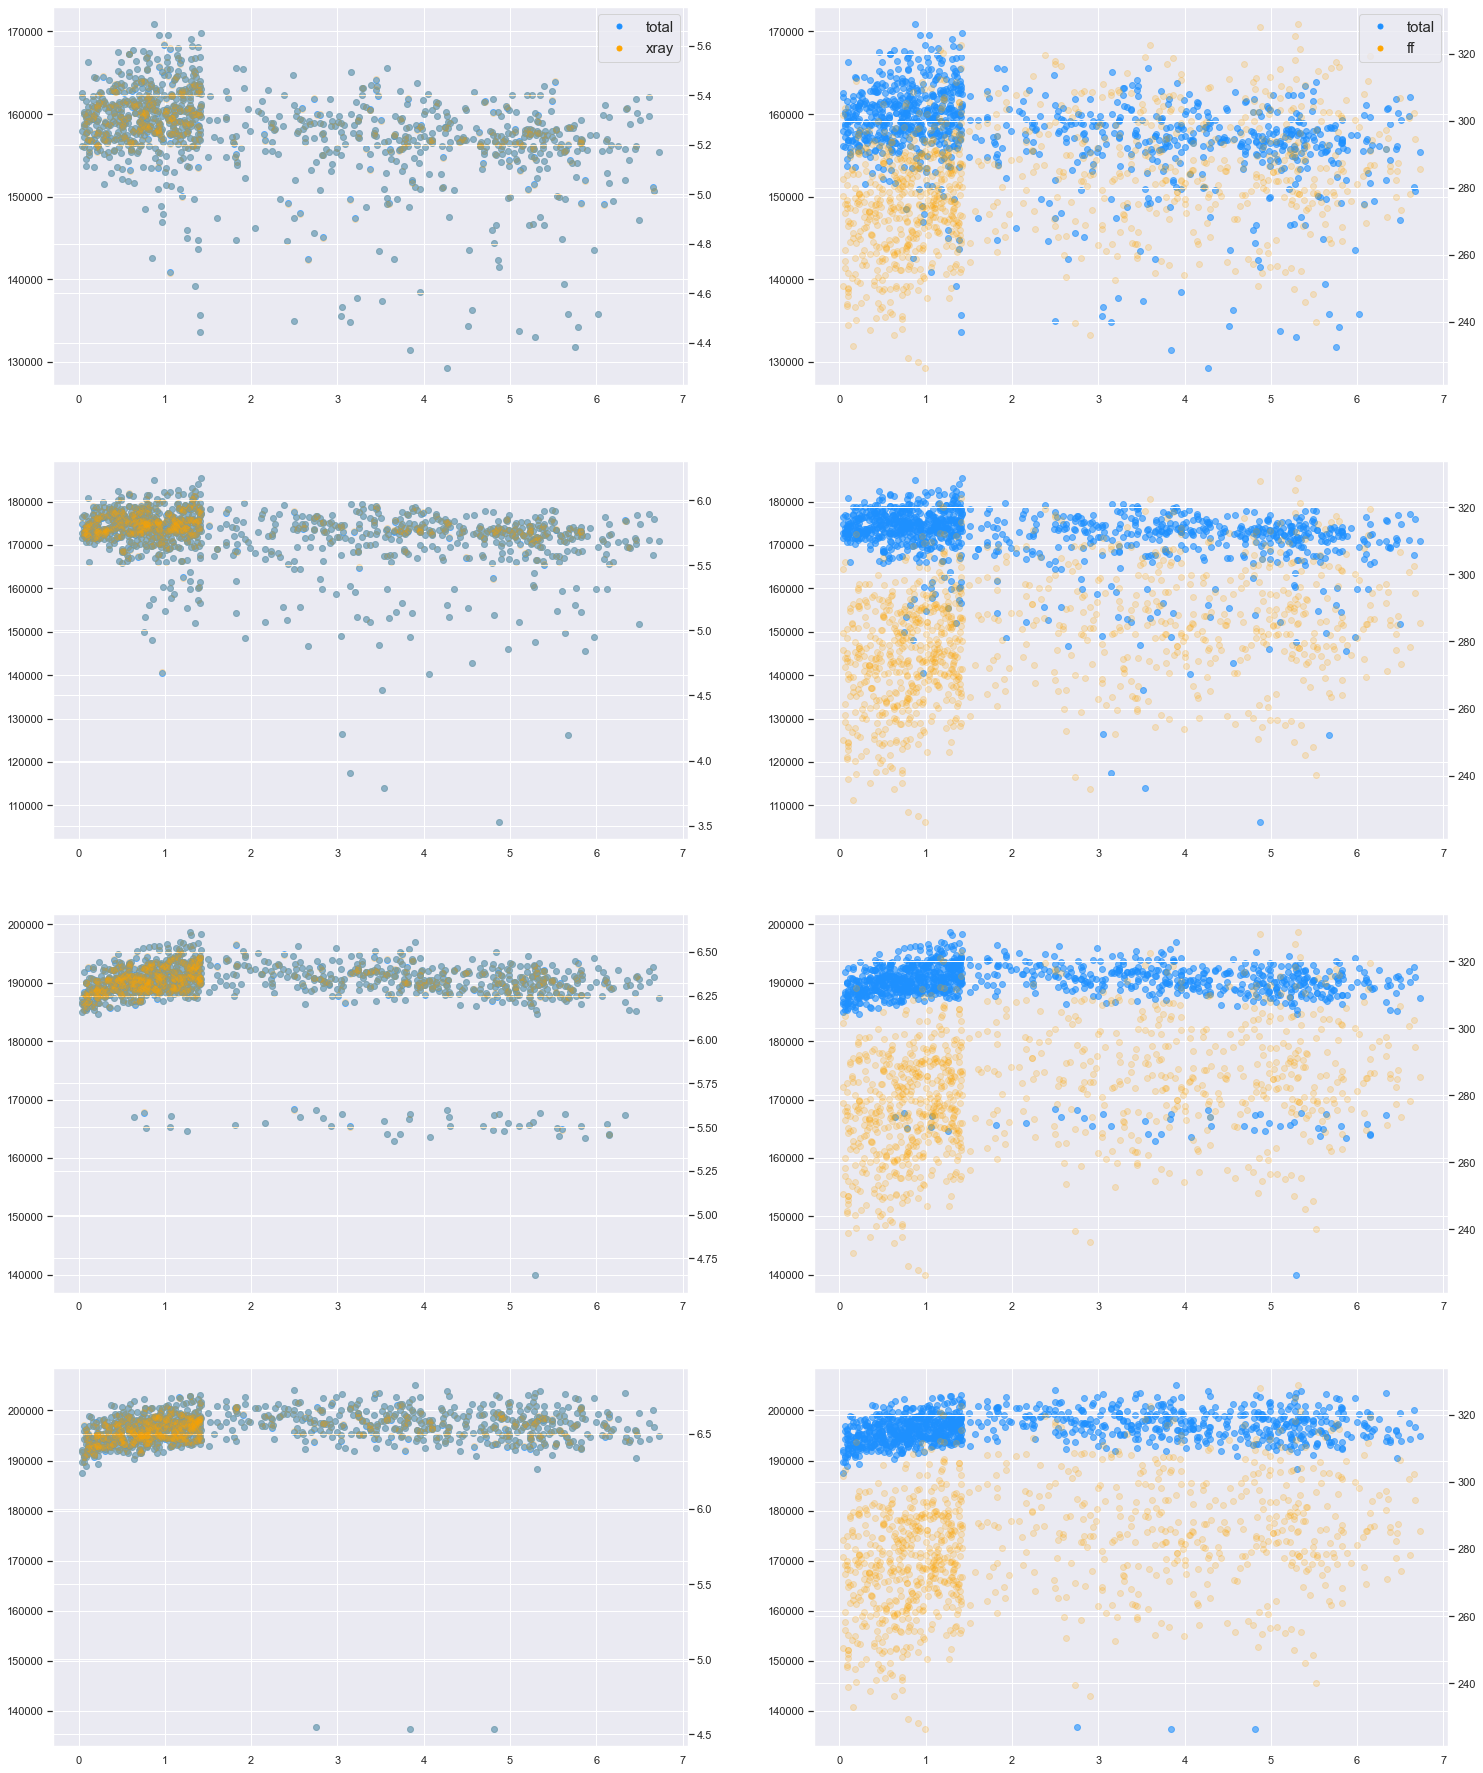

In [16]:
fig_file = Path(Path.home(), "Documents/xray/sample_bench/figures/00_ff_x5.png")

fig, axs = plt.subplots(n_row, 2, figsize=(25,8*n_row))

colors = list() 
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

alpha_off = .2
alpha_on = .6

custom_legend = list() 
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[0], linestyle='None'))
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[1], linestyle='None'))

for i in range(len(scores_dfs)):
    score_df = scores_dfs[i]
    native_df = native_dfs[i]
     
    ax1_1 = axs[i][0]
    ax1_1.scatter(score_df["rmsd"], score_df["total"], c=colors[0], alpha=alpha_on)
    ax1_1.scatter(native_df["rmsd"], native_df["total"], c=colors[2])
    
    ax1_2 = ax1_1.twinx()
    ax1_2.scatter(score_df["rmsd"], score_df["ml"], c=colors[1], alpha=alpha_off)
    ax1_2.scatter(native_df["rmsd"], native_df["ml"], c=colors[2], alpha=alpha_off)

    if i < 1: 
        plt.legend(custom_legend, ['total', 'xray'], loc="upper right", fontsize=15)
    
    ax2_1 = axs[i][1]
    ax2_1.scatter(score_df["rmsd"], score_df["total"], c=colors[0], alpha=alpha_on)
    ax2_1.scatter(native_df["rmsd"], native_df["total"], c=colors[2])

    ax2_2 = ax2_1.twinx()
    ax2_2.scatter(score_df["rmsd"], score_df["ff"], c=colors[1], alpha=alpha_off)
    ax2_2.scatter(native_df["rmsd"], native_df["ff"], c=colors[2], alpha=alpha_off)
    
    if i < 1: 
        plt.legend(custom_legend, ['total', 'ff'], loc="upper right", fontsize=15)

plt.show()
# plt.savefig(fig_file)

